In [1]:
#Importing Libraries
import pandas  as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
#Reading the file
df = pd.read_csv('C:\VsCode\Credit card transactions - India - Simple (1).csv')

In [3]:
#printing the DataFrame
df

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574
...,...,...,...,...,...,...,...
26047,26047,"Kolkata, India",22-Jun-14,Silver,Travel,F,128191
26048,26048,"Pune, India",3-Aug-14,Signature,Travel,M,246316
26049,26049,"Hyderabad, India",16-Jan-15,Silver,Travel,M,265019
26050,26050,"Kanpur, India",14-Sep-14,Silver,Travel,M,88174


In [4]:
#using info() to understand columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [5]:
#to analyze numeric columns
df.describe()

,index,Amount
count,26052.000000,26052.000000
mean,13025.500000,156411.537425
std,7520.708943,103063.254287
min,0.000000,1005.000000
25%,6512.750000,77120.250000
50%,13025.500000,153106.500000
75%,19538.250000,228050.000000
max,26051.000000,998077.000000


### Observation: - Index is useless column.
There is only amount column which is purely numerical.

In [6]:
#Droppping index column
df.drop(['index'],axis=1,inplace=True)

In [7]:
#Checking how many unique values city have
#This will determine whether I can encode the city column 

df['City'].unique()

array(['Delhi, India', 'Greater Mumbai, India', 'Bengaluru, India',
       'Ahmedabad, India', 'Markapur, India', 'Mavoor, India',
       'Sillod, India', 'Nainital, India', 'Laharpur, India',
       'Shenkottai, India', 'Neyveli (TS), India', 'Kapadvanj, India',
       'Arambagh, India', 'Thana Bhawan, India', 'Kancheepuram, India',
       'Sojat, India', 'Karjat, India', 'Mohali, India',
       'Narayanpet, India', 'Bhavnagar, India', 'Viluppuram, India',
       'Jamalpur, India', 'Udaipurwati, India', 'Palanpur, India',
       'Muzaffarpur, India', 'Taranagar, India', 'Ambikapur, India',
       'Mundi, India', 'Padrauna, India', 'Vijayapura, India',
       'Vrindavan, India', 'Byasanagar, India', 'Mudhol, India',
       'Sohna, India', 'Pune, India', 'Lakheri, India',
       'Jehanabad, India', 'Shegaon, India',
       'Shikarpur Bulandshahr, India', 'Dalli-Rajhara, India',
       'Mapusa, India', 'Uthamapalayam, India', 'Nasirabad, India',
       'Kapurthala, India', 'Anand, India'

#### Too many unique city values it would not be great to encode them. 
Let's keep it as it is

In [8]:
#checking the shape

df.shape

(26052, 6)

### Let's start encoding the categorical data

In [20]:
df['Card Type'].unique()

array(['Gold', 'Platinum', 'Silver', 'Signature'], dtype=object)

In [21]:
encoder = LabelEncoder()
df['Card Type'] = encoder.fit_transform(df['Card Type'])

df['Card Type'].unique()

array([0, 1, 3, 2])

Before encoding :- ['Gold', 'Platinum', 'Silver', 'Signature']

After encoding :- [0, 1, 3, 2]

In [23]:
#printing the df after encoding Card type column
df

,City,Date,Card Type,Exp Type,Gender,Amount
0,"Delhi, India",29-Oct-14,0,0,0,82475
1,"Greater Mumbai, India",22-Aug-14,1,0,0,32555
2,"Bengaluru, India",27-Aug-14,3,0,0,101738
3,"Greater Mumbai, India",12-Apr-14,2,0,0,123424
4,"Bengaluru, India",5-May-15,0,0,0,171574
...,...,...,...,...,...,...
26047,"Kolkata, India",22-Jun-14,3,5,0,128191
26048,"Pune, India",3-Aug-14,2,5,1,246316
26049,"Hyderabad, India",16-Jan-15,3,5,1,265019
26050,"Kanpur, India",14-Sep-14,3,5,1,88174


In [24]:
# Encoding Exp Type
df['Exp Type'].unique()

array([0, 2, 1, 4, 3, 5], dtype=int64)

In [25]:
df['Exp Type'].value_counts()

2    5463
3    5257
0    5078
1    4762
4    4754
5     738
Name: Exp Type, dtype: int64

In [26]:
# Encoding the categorical Data
encoder = LabelEncoder()
df['Exp Type'] = encoder.fit_transform(df['Exp Type'])
df['Exp Type'].value_counts()

2    5463
3    5257
0    5078
1    4762
4    4754
5     738
Name: Exp Type, dtype: int64

Food             2,
Fuel             3,
Bills            0,
Entertainment    1,
Grocery          4,
Travel           5

In [27]:
#Encoding Gender column
df['Gender'].value_counts()

0    13680
1    12372
Name: Gender, dtype: int64

In [28]:
df['Gender'] = encoder.fit_transform(df['Gender'])

df['Gender'].value_counts()

0    13680
1    12372
Name: Gender, dtype: int64

F: 0 

M: 1

In [30]:
# After encoding all categorical data print the df

df

,City,Date,Card Type,Exp Type,Gender,Amount
0,"Delhi, India",29-Oct-14,0,0,0,82475
1,"Greater Mumbai, India",22-Aug-14,1,0,0,32555
2,"Bengaluru, India",27-Aug-14,3,0,0,101738
3,"Greater Mumbai, India",12-Apr-14,2,0,0,123424
4,"Bengaluru, India",5-May-15,0,0,0,171574
...,...,...,...,...,...,...
26047,"Kolkata, India",22-Jun-14,3,5,0,128191
26048,"Pune, India",3-Aug-14,2,5,1,246316
26049,"Hyderabad, India",16-Jan-15,3,5,1,265019
26050,"Kanpur, India",14-Sep-14,3,5,1,88174


In [31]:
# again describe to understand the data in statastical manner
df.describe()

,Card Type,Exp Type,Gender,Amount
count,26052.000000,26052.000000,26052.000000,26052.000000
mean,1.528174,2.079111,0.474896,156411.537425
std,1.123899,1.463881,0.499379,103063.254287
min,0.000000,0.000000,0.000000,1005.000000
25%,1.000000,1.000000,0.000000,77120.250000
50%,2.000000,2.000000,0.000000,153106.500000
75%,3.000000,3.000000,1.000000,228050.000000
max,3.000000,5.000000,1.000000,998077.000000


C:\Users\miles.MILE-BL-4568-LA\AppData\Local\Temp\ipykernel_18276\1700929594.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cbar=True,linewidths=5)


<Axes: >

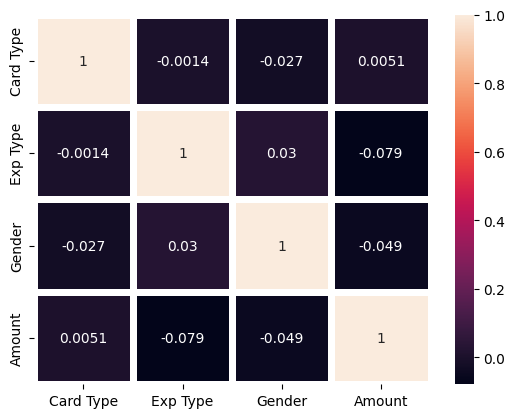

In [32]:
#plotting Heatmap to understand the correlation among the columns

sns.heatmap(df.corr(), annot=True,cbar=True,linewidths=5)

Observations:-
1. Exp Type and amount have highest negative correlation which is -0.079.
2. No other attributes are correlated.

In [ ]:
#finding patterns

#Exp Type and amount

